<a href="https://colab.research.google.com/github/mrhamedani/Gen-AI-projects-Pytorch/blob/main/MNIST_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import torchvision
from torch import nn
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np

In [108]:
transform = T.Compose([T.ToTensor()])
# MNIST dataset from torchvision includes 60,000 training and 10,000 test images with 28x28 pixels ,number(0-9) of classes = 10
train_set= torchvision.datasets.MNIST(root='.', train=True, download=True, transform=transform)
test_set= torchvision.datasets.MNIST(root='.', train=False, download=True, transform=transform)


In [109]:
# print(train_set[0])   # The tuple contains the label and image tensor
# print(train_set.data.shape)
# image , label = train_set[1]
# print(image.shape ,label)

In [120]:
batch_size=32
train_loader=torch.utils.data.DataLoader(train_set,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_set,batch_size=batch_size,shuffle=True)

In [121]:
device = "cuda" if torch.cuda.is_available() else "cpu"

input_size = 784
h_dim = 300
z_dim = 20

class AE(nn.Module):
    def __init__(self, input_size, z_dim, h_dim):
        super().__init__()
        self.common= nn.Linear(input_size, h_dim)  # 784 ---> 300 encoder
        self.encoded = nn.Linear(h_dim, z_dim) # 300 ---> 20 encoder
        self.L1 = nn.Linear(z_dim, h_dim)  # 20 ---> 300 decoder
        self.decode = nn.Linear(h_dim, input_size) # 300 ---> 784 decoder

    def encoder(self, x):
        common= F.relu(self.common(x))
        mu= self.encoded(common)
        return mu  # latent space = mu

    def decoder(self, z):
        out= F.relu(self.L1(z))
        out= torch.sigmoid(self.decode(out))
        return out

    def forward(self, x): #override
        x = x.view(-1, input_size)
        mu= self.encoder(x)
        out= self.decoder(mu)
        return out , mu

In [122]:
model = AE(input_size, h_dim, z_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.00025)

In [123]:
original_images = []
idx = 0
for img, label in test_set:
    if label == idx:
        original_images.append(img)
        idx += 1
    if idx == 10:
        break

def plot_digits():
    recostructed = []

    for idx in range(10):
        with torch.no_grad():
            img = original_images[idx].view(1, 784).to(device)
            out, mu = model(img)
        recostructed.append(out.cpu())

    imgs = recostructed + original_images
    plt.figure(figsize=(10, 2), dpi=50)

    for i in range(20):
        ax = plt.subplot(2, 10, i + 1)
        img = imgs[i].detach().cpu().numpy().reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.xticks([])
        plt.yticks([])

    plt.show()

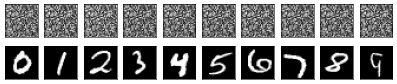

In [124]:
plot_digits()

at epoch 0 toal loss = 3248629.944580078


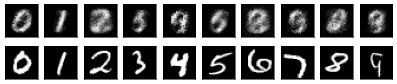

at epoch 1 toal loss = 2044429.0328979492


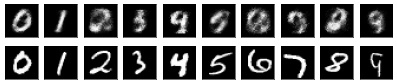

at epoch 2 toal loss = 1662233.4522705078


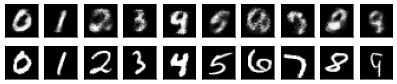

at epoch 3 toal loss = 1498103.4841308594


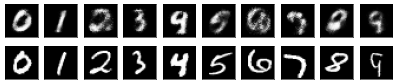

at epoch 4 toal loss = 1396984.5826416016


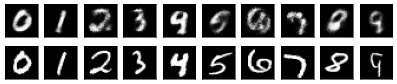

at epoch 5 toal loss = 1315397.8493041992


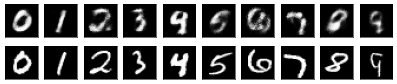

at epoch 6 toal loss = 1252776.3123779297


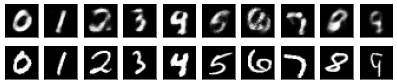

at epoch 7 toal loss = 1210608.3182678223


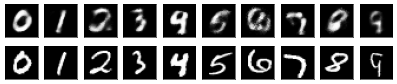

at epoch 8 toal loss = 1180432.364074707


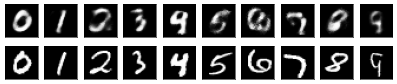

at epoch 9 toal loss = 1157280.1232299805


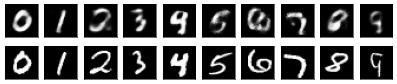

In [126]:
for epoch in range(10):
    tloss=0
    for imgs, labels in train_loader:
        # reconstruct the images
        imgs=imgs.to(device).view(-1, input_size)
        out, mu=model(imgs)
        # reconstruction loss (MSE)
        loss=((out-imgs)**2).sum()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tloss+=loss.item()
    print(f"at epoch {epoch} toal loss = {tloss}")
    # visualize the reconstructed digits
    plot_digits()